# Exploratory analysis

A collection of commonly used exploratory analysis methods and visualizations for time series analysis.

### Contents

* Visualizing time series
* Seasonal decomposition
* Autocorrelation
* t-tests

### References

* https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
* https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
* https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import forecasttk.visualize as viz

plt.style.use("seaborn-whitegrid")

## Load data

In [2]:
# Daily minimum temperatures dataset
temp_df = pd.read_csv("data/daily-min-temperatures.csv", 
                      index_col="Date")
temp_df.index = pd.to_datetime(temp_df.index).to_period("D")
temp_ts = temp_df["Temp"]

temp_ts.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Freq: D, Name: Temp, dtype: float64

In [3]:
# Catalog sales dataset
cat_df = pd.read_csv("data/catalog_seasfac.csv",
                 usecols=["date", "men", "women", "jewel", "mail", "page", "phone", "print", "service"],
                 index_col = "date")
cat_df.index = pd.to_datetime(cat_df.index).to_period("M")

cat_df.head()

,men,women,jewel,mail,page,phone,print,service
date,,,,,,,,
1989-01,11357.92,16578.93,10776.38,7978,73,34,22294.48,20
1989-02,10605.95,18236.13,10821.97,8290,88,29,27426.47,20
1989-03,16998.57,43393.55,22845.79,8029,65,24,27978.66,26
1989-04,6563.75,30908.49,11102.62,7752,85,20,28949.65,22
1989-05,6607.69,28701.58,16066.57,8685,74,17,22642.27,21


## Visualizing time series

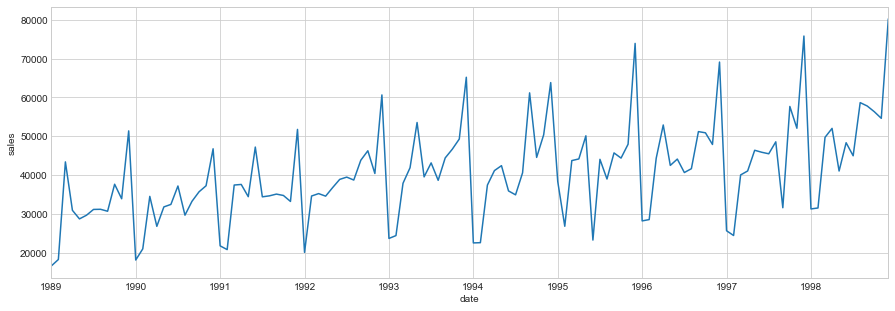

In [4]:
# Visualize one time series
viz.plot_series(cat_df["women"], xlabel="date", ylabel="sales")

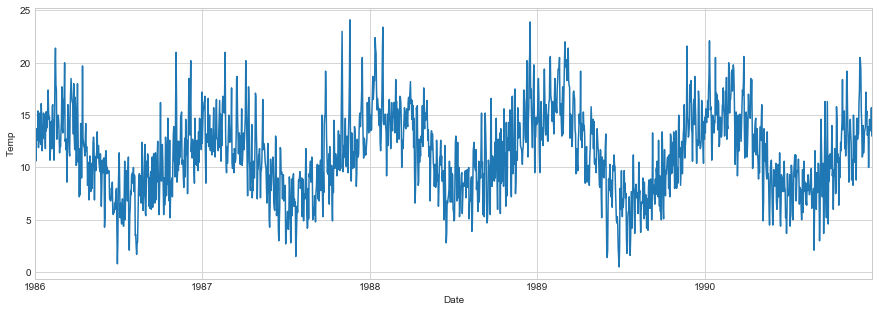

In [5]:
# Visualize a slice of one time series
viz.plot_series(temp_ts["1986":"1990"], xlabel=temp_ts.index.name, ylabel=temp_ts.name)

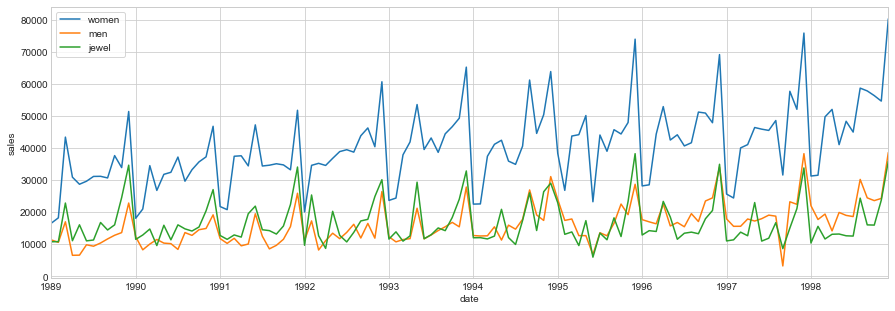

In [6]:
# Visualize several time series
viz.plot_series(cat_df["women"], cat_df["men"], cat_df["jewel"], xlabel="date", ylabel="sales")

## Seasonal decomposition

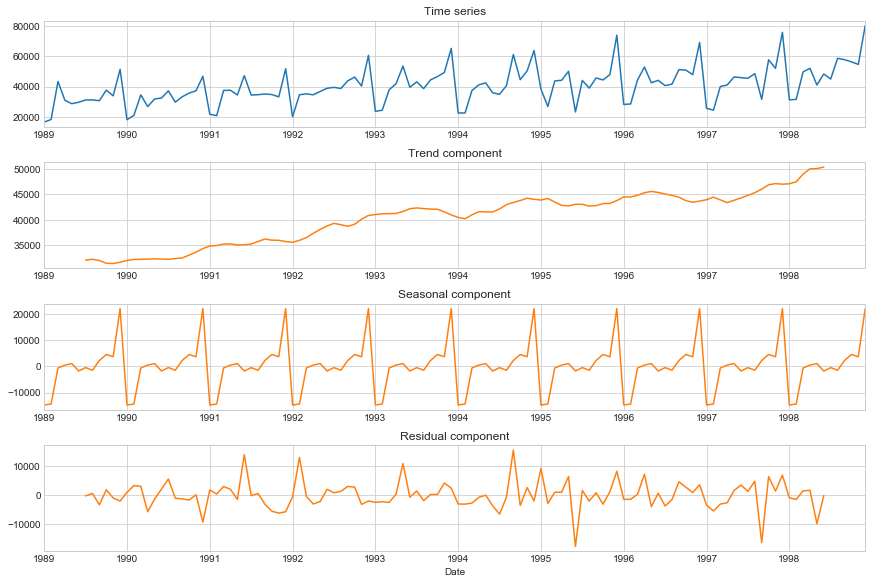

In [17]:
# Yearly seasonality - monthly data
viz.plot_seasonal_decompose(cat_df["women"], freq=12)

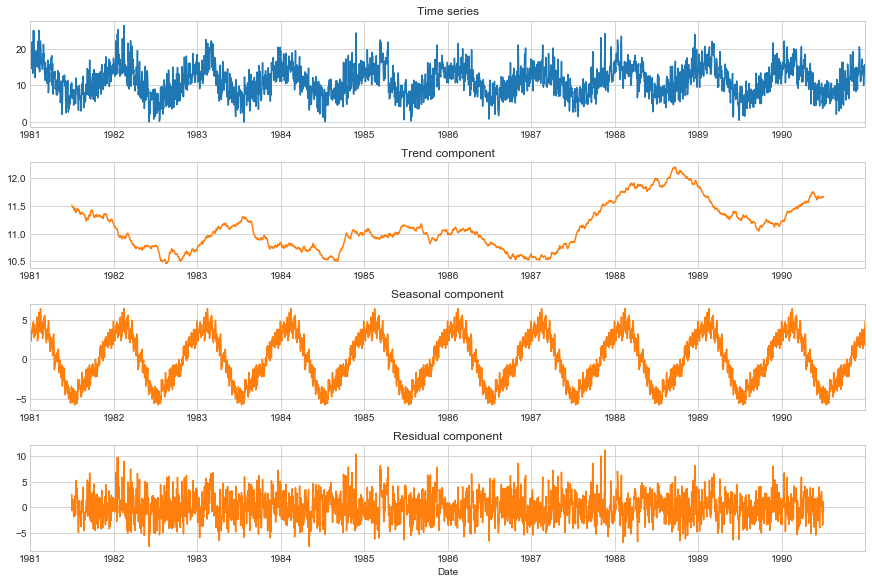

In [8]:
# Yearly seasonality - daily data
viz.plot_seasonal_decompose(temp_ts, freq=365)

## Autocorrelation

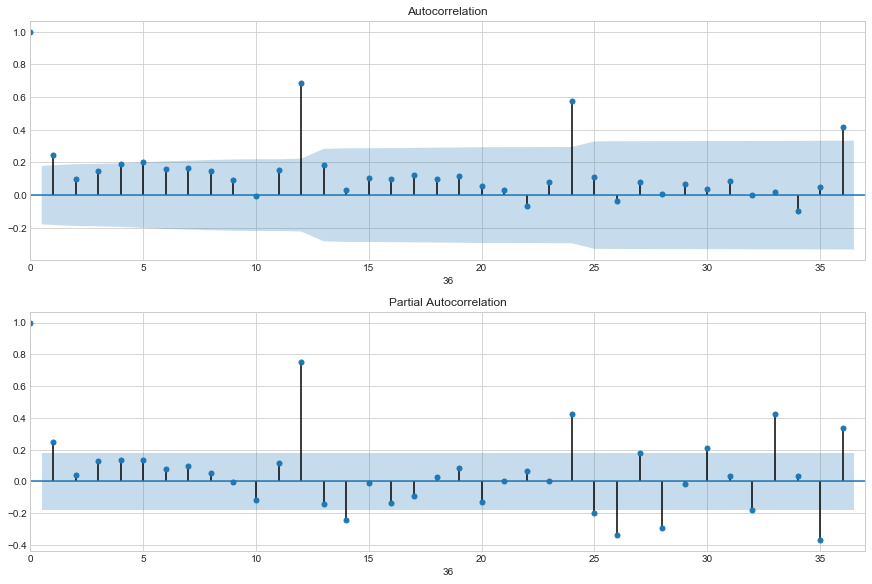

In [15]:
# Autocorrelation and partial autocorrelation functions
viz.plot_acf_pacf(cat_df["women"], lags=36)

## t-tests

Note: A low p-value means that two samples are statistically significantly different. Or a bit more precisely: The p-value is the probability that we cannot reject the null hypothesis that the two samples are not significantly different. Hence a low p-value means that we have to reject this hypthosesis, meaning that the samples are different. Common thresholds are p-values of 0.05 or 0.01 (the 95% or 99% confidence levels respectively).

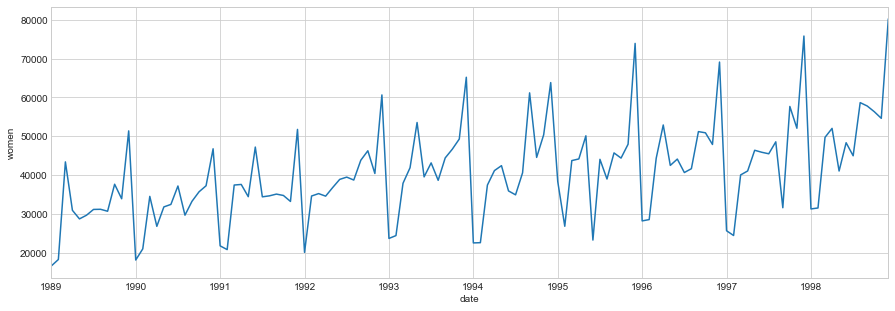

In [10]:
# Get a time series
ts = cat_df["women"]

# Visualize time series
viz.plot_series(ts, xlabel=ts.index.name, ylabel=ts.name)

In [11]:
# One-sample t-test: Is December different from other months?
stats.ttest_1samp(ts[ts.index.month==12], popmean=ts.mean())

Ttest_1sampResult(statistic=6.522565502931593, pvalue=0.00010856746115772094)

In [12]:
# Dependent t-test for paired samples: Is November different from December?
stats.ttest_rel(ts[ts.index.month==11], ts[ts.index.month==12])

Ttest_relResult(statistic=-11.415896003334499, pvalue=1.176470726870898e-06)

In [13]:
# Dependent t-test for paired samples: September is different from October?
stats.ttest_rel(ts[ts.index.month==9], ts[ts.index.month==10])

Ttest_relResult(statistic=-0.6058290495212653, pvalue=0.5595948383414409)